# Part II - what kind of status does the borrowers needs to augment the chances of getting a loan/number of investor.
## by Belmadoui Sabri



## Investigation Overview


> in this investigation iam trying to find out if the status of the borrowers affect the chances of getting a loan/number of investor.



## Dataset Overview

> This data set contains 113937 loans with 81 variables on each loan, for the purpose of this investigation I've taken the following variables: Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors. All to manipualte and study to find an answer to my question.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp '/content/gdrive/MyDrive/prosperLoanData.csv' '/content/'

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('/content/prosperLoanData.csv')

In [5]:
# here we put the Selected_columns in an array 
selected_columns =  [
     'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)','Term', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
     'Recommendations', 'Investors','LoanOriginationDate'
]

In [6]:
# and we use them here two filter only what we want
new_df = df[selected_columns]

In [7]:
# data wrangling
new_df.TotalProsperLoans = new_df.TotalProsperLoans.replace(np.nan, 0)

new_df = new_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

new_df['LoanOriginationDate'] = pd.to_datetime(new_df['LoanOriginationDate'])

new_df.drop('index', axis=1, inplace=True)

## Employment Status

> Observation:

* The majority of borrowers are employed.
* a small quantity of borrowers are either not employed, retired or part-time.

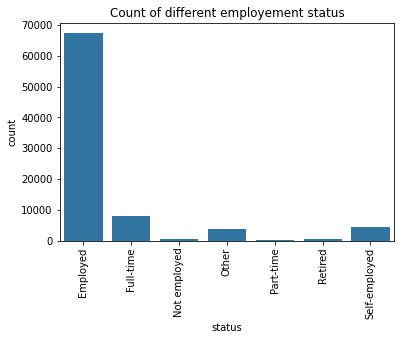

In [8]:
default_color= sb.color_palette()[0]

sb.countplot(data=new_df, x=new_df['EmploymentStatus'].sort_values(), color=default_color)
plt.xticks(rotation=90);
plt.title('Count of different employement status')
plt.xlabel('status');

## Loan status

> Observation 1:

* Most of the loans in the data set are actually current loans.
* Other relativly big part are completed loans, defaulted loans, and chargedoff loans.

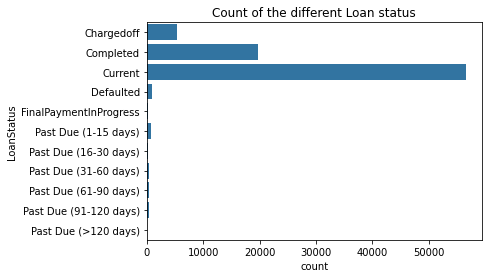

In [9]:
# we set the default color 
default_color = sb.color_palette()[0]

# and draw the plot using seaborn countplot
sb.countplot(data=new_df, y=new_df['LoanStatus'].sort_values(), color= default_color)
plt.title('Count of the different Loan status');

## Stated Monthly Income

> Observation 3:

* the plot is right skewed with a the most frequent monthly income for a borrower is about 5000$.


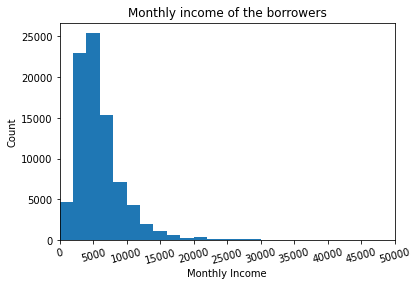

In [10]:
binss = np.arange(0, new_df['StatedMonthlyIncome'].max(), 2000)
ticks = np.arange(0,50000+5000, 5000)

plt.hist(data=new_df, x='StatedMonthlyIncome', bins=binss)
plt.xlim(0, 50000)
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(ticks, ticks, rotation=15)
plt.title('Monthly income of the borrowers');

In [3]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 635107 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\asus\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\asus\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\asus\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\asus\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\asus\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C: